In [41]:
#import relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

#modelling imports 

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor,export_text
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,f1_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from tqdm import tqdm

#Pipeline imports 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import statsmodels.api as sm 


In [2]:
#load and read the clean data

ames_clean = pd.read_csv('C:/Users/Admin/Desktop/Ames_train_clean_1.csv')

ames_clean

,saleprice,age,neighborhood_order,local_conditions,was_remodeled,overallqual,house_style_condensed_1.5,house_style_condensed_2.0,exterqual,external_feature,...,paveddrive,bsmtqual,bsmttype*sfall,bsmtexposure,heatingqc,kitchenqual,fireplacequ,qualityabovesqft,totrmsabvgrd,room_size
0,208500,5,3,2,0,7,0,1,4,10,...,2,4,4236,1,5,4,0,1710,8,213.750000
1,181500,31,4,1,0,6,0,0,3,6,...,2,4,4890,4,5,3,3,1262,6,210.333333
2,223500,7,3,2,1,7,0,1,4,10,...,2,4,2916,2,5,4,3,1786,6,297.666667
3,140000,91,3,2,1,7,0,1,3,6,...,2,3,1080,1,4,4,4,1717,7,245.285714
4,250000,8,4,2,0,8,0,1,4,10,...,2,4,3930,3,5,4,3,2198,9,244.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,175000,8,3,2,1,6,0,1,3,10,...,2,4,0,1,5,3,3,1647,7,235.285714
1442,210000,32,3,2,1,6,0,0,3,8,...,2,4,4439,1,3,3,3,2073,7,296.142857
1443,266500,69,3,2,1,7,0,1,5,10,...,2,3,1650,1,5,4,4,2340,9,260.000000
1444,142125,60,2,2,1,5,0,0,3,6,...,2,3,3381,2,4,4,0,1078,5,215.600000


In [3]:
ames_clean.columns

Index(['saleprice', 'age', 'neighborhood_order', 'local_conditions',
       'was_remodeled', 'overallqual', 'house_style_condensed_1.5',
       'house_style_condensed_2.0', 'exterqual', 'external_feature',
       'is_hip_roof', 'masvnrarea', 'functional', 'lotfrontage', 'lotarea',
       'developed_outside_sf', 'garagefin*sqft', 'garagecars', 'paveddrive',
       'bsmtqual', 'bsmttype*sfall', 'bsmtexposure', 'heatingqc',
       'kitchenqual', 'fireplacequ', 'qualityabovesqft', 'totrmsabvgrd',
       'room_size'],
      dtype='object')

Calculate a baseline score to base all of the models off of by taking the Mean Root Square Error of the mean building sale price.

In [4]:
ames_clean['sales_mean'] = ames_clean['saleprice'].mean()

mse = mean_squared_error(y_true=ames_clean['saleprice'],y_pred=ames_clean['sales_mean'])

rmse = np.sqrt(mse)

print(rmse)

71373.76133899865


In [5]:

X = ames_clean.drop(columns=['sales_mean','saleprice'])
y = ames_clean['saleprice']

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
 

Run unscaled linear regression model:



In [6]:
model1 = LinearRegression()

model1.fit(X_train,y_train)
predict1 = model1.predict(X_val)

r2 = r2_score(y_val,predict1)

print('r2_score:',r2)

r2_score: 0.8626098543903811


In [7]:
#let's take a quick look at the summary stats of our ordinary least squares

X = sm.add_constant(X)
ols = sm.OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     363.4
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:57:15   Log-Likelihood:                -16716.
No. Observations:                1446   AIC:                         3.349e+04
Df Residuals:                    1418   BIC:                         3.364e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.723e+05   1.54e+04    -11.202      0.000   -2.02e+05   -1.42e+05
age                          29.1829     46.659      0.625      0.532     -62.345     120.710
neighborhood_order         9772.1428   1092.350      8.946      0.000    7629.347    1.19e+04
local_conditions           3155.5948   1801.866      1.751      0.080    -379.015    6690.205
was_remodeled              6271.4188   1610.668      3.894      0.000    3111.870    9430.967
overallqual                 1.02e+04    956.084     10.665      0.000    8321.464    1.21e+04
house_style_condensed_1.5 -2482.8126   2321.441     -1.070      0.285   -7036.640    2071.014
house_style_condensed_2.0 -9834.1511   1990.832     -4.940      0.000   -1.37e+04   -5928.859
exterqual                  1.019e+04   2059.226      4.948      0.000    6148.743    1.42e+04
external_feature           1267.4894    423.543      2.993      0.003     436.650    2098.329
is_hip_roof                5142.5026   1841.470      2.793      0.005    1530.205    8754.801
masvnrarea                   15.6731      4.536      3.455      0.001       6.775      24.571
functional                 5343.7988   1068.847      5.000      0.000    3247.108    7440.490
lotfrontage                 117.4181     38.057      3.085      0.002      42.764     192.073
lotarea                       0.3875      0.076      5.086      0.000       0.238       0.537
developed_outside_sf         19.3634      4.923      3.933      0.000       9.706      29.020
garagefin*sqft                8.8548      1.912      4.631      0.000       5.104      12.605
garagecars                 3491.1454   1446.720      2.413      0.016     653.205    6329.086
paveddrive                  221.8370   1535.124      0.145      0.885   -2789.522    3233.196
bsmtqual                   2966.5455   1142.980      2.595      0.010     724.432    5208.659
bsmttype*sfall                4.0508      0.339     11.939      0.000       3.385       4.716
bsmtexposure               2845.5105    760.026      3.744      0.000    1354.615    4336.406
heatingqc                  1809.1736    882.813      2.049      0.041      77.415    3540.932
kitchenqual                8027.6133   1606.865      4.996      0.000    4875.525    1.12e+04
fireplacequ                1597.8628    460.009      3.474      0.001     695.492    2500.234
qualityabovesqft             39.1115      6.148      6.361      0.000      27.051      51.172
totrmsabvgrd               2648.0258   1487.437      1.780      0.075    -269.787    5565.838
room_size                    27.5492     40.771      0.676      0.499     -52.429     107.527
==============================================================================
Omnibus:                      499.941   Durbin-Watson:                   2.011
Prob(Omnibu

The variables 'local_conditions','house_style_condensed_1.5','lotfrontage','developed_outside_sf','paveddrive','heatingqc','room_size','outdooramenitiesarea' do not pass and we cannot reject the null hypothesis.
However, they are kept in order to preserve feature choice for the Home Buyers Toolbox

A look at OLS, scaled (all models here on out are scaled)

In [8]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_val = sc.transform(X_val)
model1_scaled = LinearRegression()
model1_scaled.fit(Z_train, y_train)
print(f' Scaled Linear Regression training R^2 score: {round(model1_scaled.score(Z_train, y_train),4)}')
print(f' Scaled Linear Regression test R^2 score: {round(model1_scaled.score(Z_val, y_val),4)}')

 Scaled Linear Regression training R^2 score: 0.8729
 Scaled Linear Regression test R^2 score: 0.8626


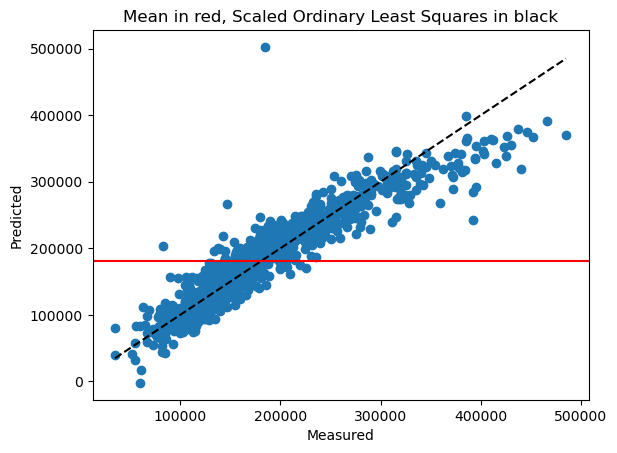

In [9]:

y_preds = model1_scaled.predict(Z_train)

fig,ax = plt.subplots()
ax.scatter(y_train,y_preds)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Scaled Ordinary Least Squares in black")
plt.show()


In [10]:
y_mean = y_train.mean()

y_mean

180874.26211072665

In [13]:
mse = mean_squared_error(y_train,y_preds)

rmse = np.sqrt(mse)

print('rmse:',rmse)

rmse: 25958.476810206612


C:\Users\Admin\AppData\Local\Temp\ipykernel_8444\1279342679.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


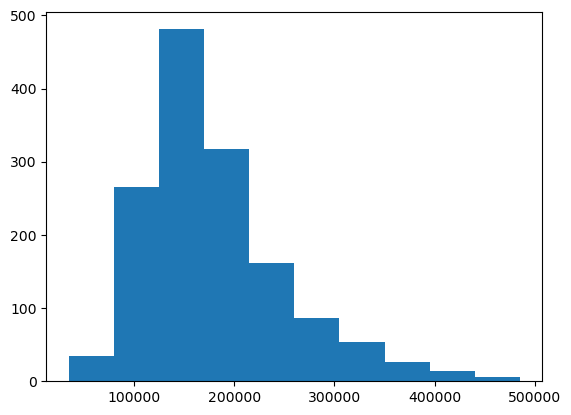

In [16]:
fig,ax = plt.subplots()
ax.hist(ames_clean['saleprice'],bins = 10)
fig.show()

In [17]:
from scipy.stats import skew

print(skew(ames_clean['saleprice'],axis=0,bias=True))

1.1945693512630515


In [18]:
ames_clean['price_log'] = np.log(ames_clean['saleprice'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8444\2940502489.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


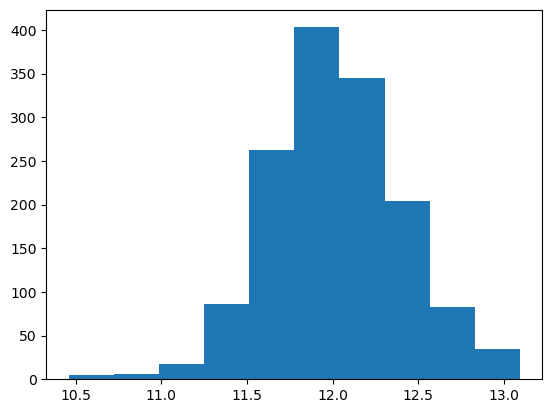

In [19]:
fig,ax = plt.subplots()
ax.hist(ames_clean['price_log'],bins=10)
fig.show()

In [20]:
print(skew(ames_clean['price_log'], axis=0, bias=True))

-0.04532494122342672


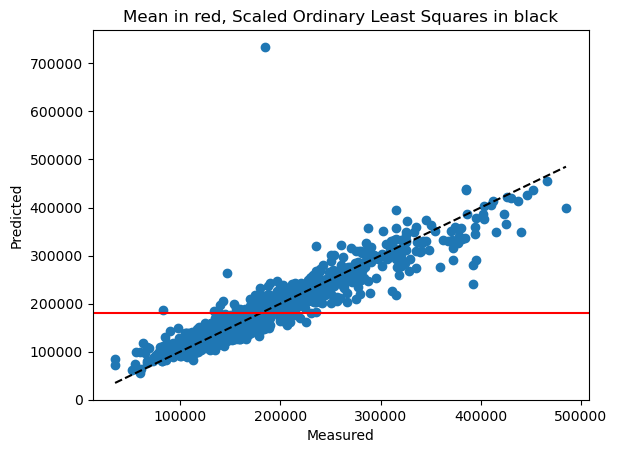

In [22]:
# create X and y variables

X_log = ames_clean.drop(columns=['saleprice','sales_mean','price_log'])
y_log = ames_clean['price_log']

#split into training and test groups
X_train_log,X_val_log,y_train_log,y_val_log = train_test_split(X_log,y_log,test_size=0.2,random_state=42)

#instatiate fit and score

lr_logg = LinearRegression()
lr_logg.fit(X=X_train_log,y=y_train_log)

preds_log = lr_logg.predict(X_train)
price_log_to_norm = np.exp(preds_log)

fig,ax = plt.subplots()
ax.scatter(y_train,price_log_to_norm)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Scaled Ordinary Least Squares in black")
plt.show()

In [23]:
mse = mean_squared_error(y_train,price_log_to_norm)

rmse = np.sqrt(mse)

print('rmse:',rmse)

rmse: 27202.019056346224


RidgeCV Regression

In [27]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

r_alphas = np.logspace(0,5,100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas,scoring='r2',cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train,y_train)

# Here is the optimal value of alpha
ridge_cv.alpha_

166.81005372000593

In [28]:
print(f' RidgeCV Regression training R^2 score: {round(ridge_cv.score(Z_train, y_train),4)}')
print(f' RidgeCV Regression test R^2 score: {round(ridge_cv.score(Z_val, y_val),4)}')

 RidgeCV Regression training R^2 score: 0.8706
 RidgeCV Regression test R^2 score: 0.8653


In [29]:
ridge_preds = ridge_cv.predict(Z_train)
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=ridge_preds )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 26197.41.


LassoCV Regression

In [30]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 3, 500)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=10000)
# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)
#best found alpha
lasso_cv.alpha_

660.1449092734883

In [31]:
print(f' LassoCV Regression training R^2 score: {round(lasso_cv.score(Z_train, y_train),4)}')
print(f' LassoCV Regression test R^2 score: {round(lasso_cv.score(Z_val, y_val),4)}')

 LassoCV Regression training R^2 score: 0.8719
 LassoCV Regression test R^2 score: 0.8648


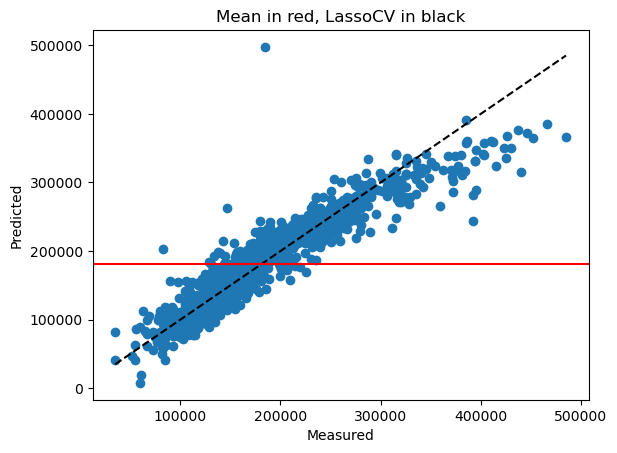

In [32]:
y_preds = lasso_cv.predict(Z_train)
fig, ax = plt.subplots()
ax.scatter(y_train, y_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, LassoCV in black")
plt.show()

In [33]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 26062.04.


* Lasso Model

In [34]:
lasso_pipe = Pipeline([
    ('sc',StandardScaler()),
    ('lassocv',Lasso())
])

lasso_params = {'lassocv__alpha':np.logspace(-1,3,1000),
                'lassocv__max_iter':[5000],
                'lassocv__warm_start':[True]}
#apply pipeline and gridsearch to GridSearchCV
lasso_pipe_gridsearch = GridSearchCV(lasso_pipe,param_grid=lasso_params)
#fit best result from grid search
lasso_pipe_gridsearch.fit(X_train,y_train)
lasso_pipe_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('lassocv',
                 Lasso(alpha=744.5122910795136, max_iter=5000,
                       warm_start=True))])

In [35]:
print(f'LassoCV R^2 Score: {round(lasso_pipe_gridsearch.best_score_,4)}')

LassoCV R^2 Score: 0.8524


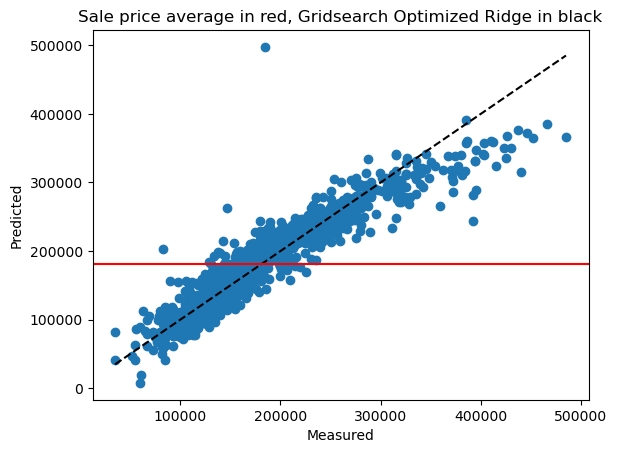

In [36]:
y_preds_lassocv = lasso_pipe_gridsearch.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(y_train, y_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized Ridge in black")
plt.show()

In [37]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds_lassocv )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 26083.83.


In [38]:
lasso_sc = StandardScaler()
lasso_Z_train = lasso_sc.fit_transform(X_train)
lasso_Z_test = lasso_sc.fit_transform(X_val)
lasso_coef_eval = Lasso(alpha =744.5122910795136, max_iter=5000)
lasso_coef_eval.fit(lasso_Z_train, y_train)
print(f'Lasso R^2 Cross Validated Score: {round(cross_val_score(lasso_coef_eval, lasso_Z_train, y_train).mean(),4)}')
print(lasso_coef_eval.intercept_)
project_model = pd.DataFrame(list(zip(X_train.columns, lasso_coef_eval.coef_)))
project_model

Lasso R^2 Cross Validated Score: 0.8526
180874.26211072665


,0,1
0,age,-0.000000
1,neighborhood_order,10482.293850
2,local_conditions,0.000000
3,was_remodeled,2420.761332
4,overallqual,14560.929947
5,house_style_condensed_1.5,-0.000000
6,house_style_condensed_2.0,-3156.875499
7,exterqual,5527.398900
8,external_feature,1460.938639
9,is_hip_roof,1572.456382


In [39]:
# put the two functions above together, using 'write binary' permissions
# Save the model with pickle
pickle.dump(lasso_coef_eval, open('model_ames.p', 'wb'))